In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

cart_out = '/ec/res4/scratch/ccff/ece3/{}/cmorized/'

In [2]:
from climtools import climtools_lib as ctl

No DISPLAY variable set. Switching to agg backend


In [3]:
%matplotlib inline

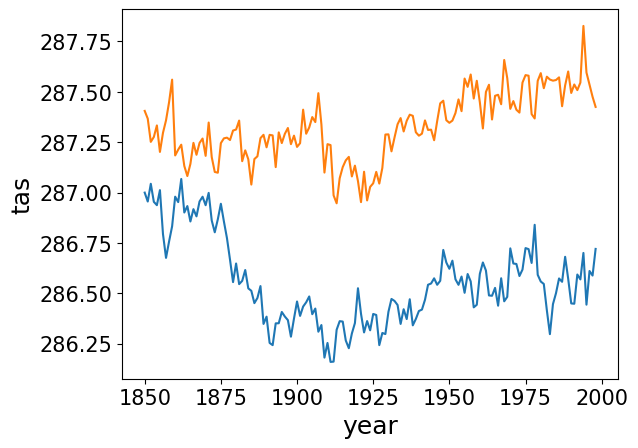

In [4]:
tasfil1 = cart_out.format('pi9r') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/Amon/tas/gr/v*/*nc'
tasfil2 = cart_out.format('pic9') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p9f1/Amon/tas/gr/v*/*nc'
tas1 = xr.open_mfdataset(tasfil1)
tas2 = xr.open_mfdataset(tasfil2)
tasme1 = ctl.global_mean(tas1['tas'].groupby('time.year').mean())
tasme2 = ctl.global_mean(tas2['tas'].groupby('time.year').mean())
tasme1.plot()
tasme2.plot()
plt.title('')

pimean1 = tasme1[-30:].mean()
pimean2 = tasme2[-30:].mean()

In [5]:
tas1_ok = tas1['tas'].groupby('time.year').mean()[-30:].mean('year')
tas2_ok = tas2['tas'].groupby('time.year').mean()[-30:].mean('year')

Adding cyclic point



<GeoAxesSubplot: >

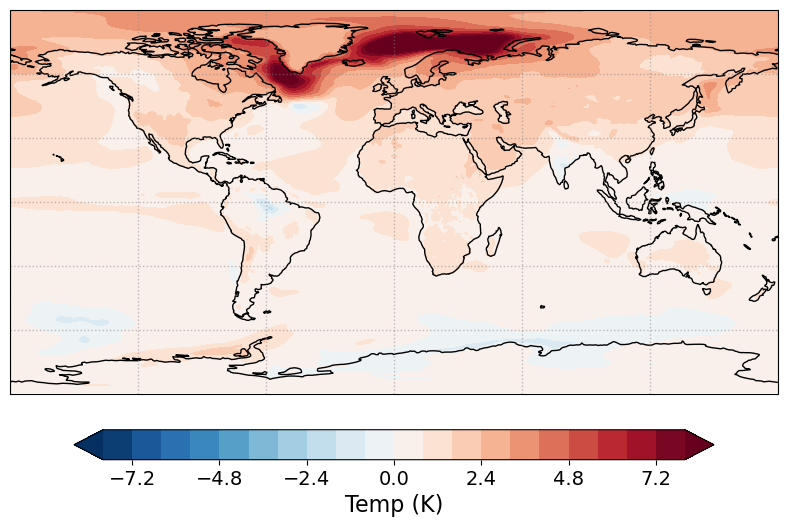

In [6]:
ctl.plot_map_contour(tas2_ok-tas1_ok, cbar_range = [-8, 8], cb_label = 'Temp (K)')

In [11]:
tas1_ok.compute()

<xarray.DataArray 'tas' ()>
array(277.81418, dtype=float32)
Coordinates:
    height   float64 2.0

In [5]:
miptab = 'Amon'
varnam = 'ua'

fil1 = cart_out.format('pi9r') + f'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/{miptab}/{varnam}/gr/v*/*nc'
fil2 = cart_out.format('pic9') + f'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p9f1/{miptab}/{varnam}/gr/v*/*nc'

import glob

fil1ok = glob.glob(fil1)
fil2ok = glob.glob(fil2)
fil1ok.sort()
fil2ok.sort()

var1 = xr.open_mfdataset(fil1ok[-40:])
var1_ok = var1.sel(plev = 85000.)
var1_mean = var1_ok.sel(time = var1_ok.time.dt.month.isin([1,2,12])).mean('time').compute()

var2 = xr.open_mfdataset(fil2ok[-40:])
var2_ok = var2.sel(plev = 85000.)
var2_mean = var1_ok.sel(time = var2_ok.time.dt.month.isin([1,2,12])).mean('time').compute()
var2_mean = var2_ok.groupby('time.season').mean().sel(season = 'DJF').compute()

#var1_mean = ctl.sel_season_xr(var1_ok, 'DJF', calc_average = True)
#var2_mean = ctl.sel_season_xr(var2_ok, 'DJF', calc_average = True)

30318126.748108074
Adding cyclic point



<GeoAxesSubplot: >

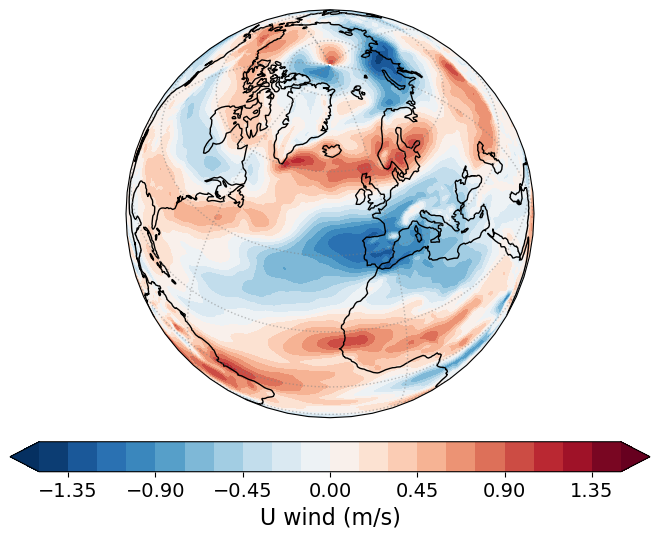

In [15]:
ctl.plot_map_contour(var2_mean['ua']-var1_mean['ua'], visualization = 'nearside', central_lat_lon = (50, -20), bounding_lat=-30, cbar_range = (-1.5, 1.5), cb_label = 'U wind (m/s)')

Adding cyclic point



<GeoAxesSubplot: >

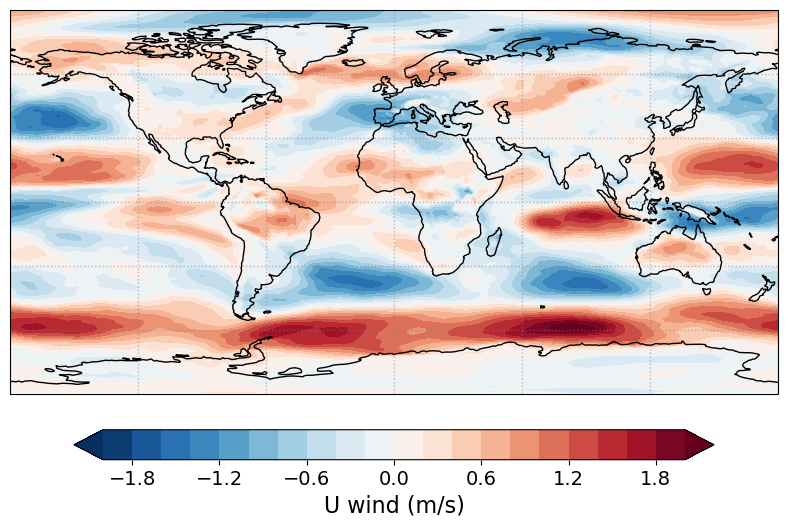

In [18]:
ctl.plot_map_contour(var2_mean['ua']-var1_mean['ua'], cbar_range = (-2, 2), cb_label = 'U wind (m/s)')

In [19]:
miptab = 'Amon'
varnam = 'zg'

fil1 = cart_out.format('pi9r') + f'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/{miptab}/{varnam}/gr/v*/*nc'
fil2 = cart_out.format('pic9') + f'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p9f1/{miptab}/{varnam}/gr/v*/*nc'

import glob

fil1ok = glob.glob(fil1)
fil2ok = glob.glob(fil2)
fil1ok.sort()
fil2ok.sort()

var1 = xr.open_mfdataset(fil1ok[-40:])
var1_ok = var1.sel(plev = 50000.)
var1_mean = var1_ok.sel(time = var1_ok.time.dt.month.isin([1,2,12])).mean('time').compute()

var2 = xr.open_mfdataset(fil2ok[-40:])
var2_ok = var2.sel(plev = 50000.)
var2_mean = var1_ok.sel(time = var2_ok.time.dt.month.isin([1,2,12])).mean('time').compute()
var2_mean = var2_ok.groupby('time.season').mean().sel(season = 'DJF').compute()

#var1_mean = ctl.sel_season_xr(var1_ok, 'DJF', calc_average = True)
#var2_mean = ctl.sel_season_xr(var2_ok, 'DJF', calc_average = True)

Adding cyclic point



<GeoAxesSubplot: >

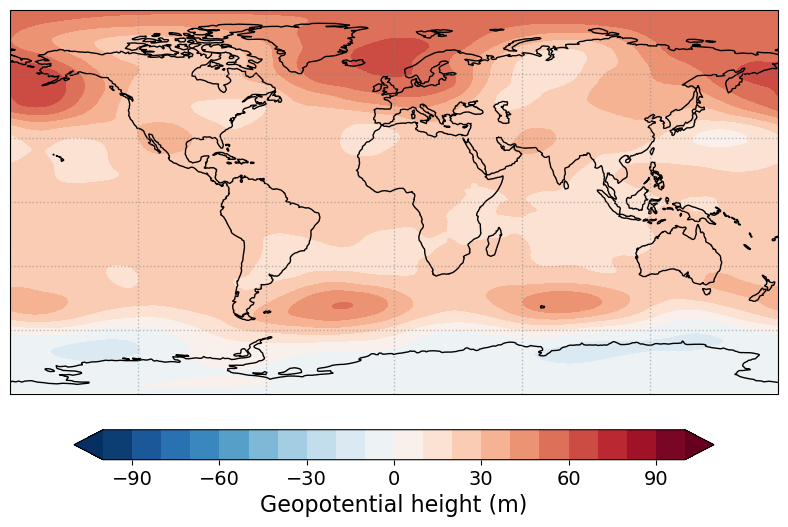

In [22]:
ctl.plot_map_contour(var2_mean['zg']-var1_mean['zg'], cbar_range = (-100, 100), cb_label = 'Geopotential height (m)', visualization = 'Npolar')

In [ ]:
fil1 = cart_out.format('pi9r') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/Amon/tas/gr/v*/*nc'
fil2 = cart_out.format('pic9') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p9f1/Amon/tas/gr/v*/*nc'
tas1 = xr.open_mfdataset(tasfil1)
tas2 = xr.open_mfdataset(tasfil2)
tasme1 = ctl.global_mean(tas1['tas'].groupby('time.year').mean())
tasme2 = ctl.global_mean(tas2['tas'].groupby('time.year').mean())
tasme1.plot()
tasme2.plot()
plt.title('')

pimean1 = tasme1[-30:].mean()
pimean2 = tasme2[-30:].mean()

/ec/res4/scratch/ccff/ece3/pi9r/cmorized/cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/Omon/msftyz/g*/v*/*nc


Text(0.5, 1.0, '')

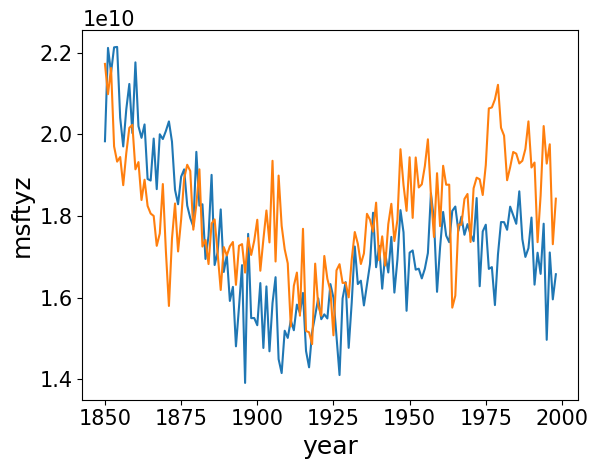

In [9]:
mocfil1 = cart_out.format('pi9r') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p8f1/Omon/msftyz/g*/v*/*nc'
mocfil2 = cart_out.format('pic9') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/piControl/r1i1p9f1/Omon/msftyz/g*/v*/*nc'
print(mocfil1)
coso1 = xr.open_mfdataset(mocfil1, use_cftime = True)['msftyz']
coso2 = xr.open_mfdataset(mocfil2, use_cftime = True)['msftyz']
amax1 = coso1.sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).groupby('time.year').mean().max(['rlat', 'lev']) # basin = 1 should be Atlantic, 0 global, 2 indian/pacific
amax2 = coso2.sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).groupby('time.year').mean().max(['rlat', 'lev']) # basin = 1 should be Atlantic, 0 global, 2 indian/pacific
#amoc_max.append(amax)
amax1.plot()
amax2.plot()
plt.title('')

## now for 4xCO2

In [10]:
mocfil1 = cart_out.format('c49r') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/abrupt-4xCO2/r1i1p8f1/Omon/msftyz/g*/v*/*nc'
mocfil2 = cart_out.format('c4c9') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/abrupt-4xCO2/r1i1p9f1/Omon/msftyz/g*/v*/*nc'
coso1 = xr.open_mfdataset(mocfil1, use_cftime = True)['msftyz']
coso2 = xr.open_mfdataset(mocfil2, use_cftime = True)['msftyz']
amax1_4x = coso1.sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).groupby('time.year').mean().max(['rlat', 'lev']) # basin = 1 should be Atlantic, 0 global, 2 indian/pacific
amax2_4x = coso2.sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).groupby('time.year').mean().max(['rlat', 'lev']) # basin = 1 should be Atlantic, 0 global, 2 indian/pacific
#amoc_max.append(amax)
amax1_4x.plot()
amax2_4x.plot()
plt.title('')

OSError: no files to open

Text(0.5, 1.0, '')

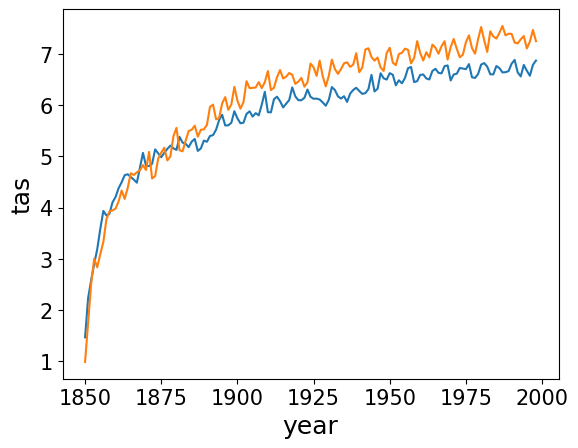

In [13]:
tasfil1 = cart_out.format('c49r') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/abrupt-4xCO2/r1i1p8f1/Amon/tas/gr/v*/*nc'
tasfil2 = cart_out.format('c4c9') + 'cmor_*/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/abrupt-4xCO2/r1i1p9f1/Amon/tas/gr/v*/*nc'
tas1 = xr.open_mfdataset(tasfil1)
tas2 = xr.open_mfdataset(tasfil2)
tasme1 = ctl.global_mean(tas1['tas'].groupby('time.year').mean()) - pimean1
tasme2 = ctl.global_mean(tas2['tas'].groupby('time.year').mean()) - pimean2
tasme1.plot()
tasme2.plot()
plt.title('')

In [17]:
tasme1[-30:].values

array([6.77607984, 6.48214069, 6.60034189, 6.61361743, 6.72724766,
       6.71611894, 6.70300543, 6.8017823 , 6.54490401, 6.5312703 ,
       6.60848693, 6.79316247, 6.82142   , 6.75226381, 6.60302303,
       6.6006094 , 6.7647893 , 6.72343297, 6.63966692, 6.64378584,
       6.66488945, 6.80898768, 6.88440229, 6.63951764, 6.56157073,
       6.78531748, 6.67302124, 6.57460027, 6.78792774, 6.87103498])

In [19]:
c4mean1 = tasme1[-30:].mean()
c4mean2 = tasme2[-30:].mean()

print((c4mean2-c4mean1).compute()/2.)

<xarray.DataArray 'tas' ()>
array(0.28003251)
Coordinates:
    height   float64 2.0
